In [1]:
import pandas as pd

#df = pd.read_pickle('https://pandora.infn.it/public/8d6872/dl/dataset_pol_vbs_full2018v9_VBS_WW_2j.pkl')
df = pd.read_pickle('https://pandora.infn.it/public/63bb2f/dl/dataset_pol_vbs_full2018v9_VBS_WW_2j_new.pkl')
pd.set_option('display.max_columns', None)
df = df.drop(columns=['LHEcosthetastarcmww_lminus', 'LHEcosthetastarcmww_lplus', 'LHEPart_pt_0', 'LHEPart_pt_1', 'LHEPart_eta_0', 'LHEPart_eta_1', 'LHEPart_phi_0', 'LHEPart_phi_1', 'LHEPart_mass_0', 'LHEPart_mass_1', 'LHEPart_pdgId_0', 'LHEPart_pdgId_1',])
#df = df.drop(columns=['nlep', 'njet'])
df.dropna(inplace=True)
df

,LHEPart_eta_2,LHEPart_eta_3,LHEPart_eta_4,LHEPart_eta_5,LHEPart_eta_6,LHEPart_eta_7,LHEPart_mass_2,LHEPart_mass_3,LHEPart_mass_4,LHEPart_mass_5,LHEPart_mass_6,LHEPart_mass_7,LHEPart_pdgId_2,LHEPart_pdgId_3,LHEPart_pdgId_4,LHEPart_pdgId_5,LHEPart_pdgId_6,LHEPart_pdgId_7,LHEPart_phi_2,LHEPart_phi_3,LHEPart_phi_4,LHEPart_phi_5,LHEPart_phi_6,LHEPart_phi_7,LHEPart_pt_2,LHEPart_pt_3,LHEPart_pt_4,LHEPart_pt_5,LHEPart_pt_6,LHEPart_pt_7,Rpt,Zepp_l1,Zepp_l2,Zepp_ll,detajj,eta_j1,eta_j2,eta_l1,eta_l2,mjj,mll,njet,nlep,pdgid_l1,pdgid_l2,phi_j1,phi_j2,phi_l1,phi_l2,pt_j1,pt_j2,pt_l1,pt_l2,ptll,ptmiss,ptphi,isLL,isMIX,isTT,isBKG
0,0.451920,2.342896,-1.077454,0.421310,2.946899,-1.235657,-0.001064,0.000206,0.000872,0.000111,-0.001079,0.000098,-13.0,14.0,11.0,-12.0,2.0,-5.0,0.415894,-0.219398,-3.035645,-2.368530,-2.752686,0.230804,141.984375,8.954590,71.046875,29.576172,100.507812,47.460938,3.121000,-0.493042,-2.089111,1.291077,3.776367,2.835449,-0.940918,0.454224,-1.141846,369.785309,251.217087,4.0,2.0,-13.0,11.0,-2.706543,0.575562,0.465759,3.018066,85.704681,34.702194,143.582367,64.647858,96.756378,20.823217,-1.292615,1.0,0.0,0.0,0.0
1,-0.003099,0.143005,0.597504,-0.053663,-0.219368,-3.073853,0.000126,-0.000134,-0.000828,0.000958,-0.000490,0.011747,-11.0,12.0,11.0,-12.0,2.0,-4.0,-1.584595,2.898926,-2.694580,3.019409,0.890198,-0.598511,42.925781,53.830078,85.832031,104.531250,177.335938,148.156250,0.174566,2.262878,1.649446,1.956162,2.820435,-3.073242,-0.252808,0.599854,-0.013578,625.133850,72.537148,6.0,2.0,11.0,-11.0,-0.617432,0.904297,-2.550293,-1.547607,187.422958,122.559952,86.586983,46.310486,118.139442,160.278671,2.963379,1.0,0.0,0.0,0.0
2,-0.673035,0.079590,0.278580,1.553528,1.449158,-2.466064,1.776978,0.000260,0.000279,-0.000110,0.000490,0.003877,-15.0,16.0,11.0,-12.0,2.0,-1.0,3.044189,-1.888123,-1.044373,1.915527,-2.310181,0.756805,65.242188,47.078125,44.783203,24.725586,78.062500,162.414062,0.101411,0.720459,-0.154663,0.282898,4.667969,-2.785645,1.882324,0.268799,-0.606323,964.531616,60.436550,5.0,2.0,11.0,-11.0,0.683594,-2.258301,-0.911011,3.036621,134.064819,63.955444,43.268951,20.095602,32.741360,52.529774,2.673340,1.0,0.0,0.0,0.0
3,1.376648,1.044922,-0.337112,-1.169495,-2.658691,4.116699,1.776978,0.000876,-0.000293,-0.000233,0.002343,0.018592,-15.0,16.0,13.0,-14.0,2.0,2.0,-0.075584,1.925781,-0.751617,-2.211060,1.865051,-1.791565,32.693359,65.417969,84.312500,31.147461,115.222656,88.746094,0.319307,-0.882874,0.757812,0.062531,6.555664,3.874023,-2.681641,-0.286682,1.354004,2529.641357,104.620178,4.0,2.0,13.0,-11.0,-1.653076,2.024902,-0.781616,-0.118011,96.125755,94.413933,90.736679,31.937508,117.554039,36.320225,2.645425,1.0,0.0,0.0,0.0
4,-2.069824,-4.067871,2.263184,1.356995,-3.063232,2.004883,-0.002164,0.001588,0.001546,0.000839,-0.016230,-0.003783,-13.0,14.0,11.0,-12.0,1.0,-2.0,2.218628,2.541748,-1.359314,-1.703003,-1.276123,1.408264,141.531250,8.224121,63.544922,99.523438,189.742188,227.851562,0.143195,-1.701904,2.665771,0.481934,4.703613,1.912109,-2.791504,-2.141602,2.226074,2628.467041,848.424438,6.0,2.0,-13.0,11.0,1.287109,-0.681152,1.925781,-1.184326,274.317688,226.593491,144.917450,61.419807,83.550461,144.095169,-1.629096,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150907,-0.834686,-1.167908,-0.622986,-1.967773,3.580566,-1.739136,1.776978,0.001289,-0.000266,-0.000809,-0.008293,0.001163,-15.0,16.0,13.0,-14.0,2.0,1.0,2.569336,1.756042,-0.964691,-0.690216,2.249756,-1.176697,76.445312,113.726562,52.906250,55.509766,61.294922,132.195312,0.119845,-1.498657,-1.836914,1.667786,5.092041,-1.640869,3.451172,-0.593506,-0.931763,1345.346436,73.458191,8.0,2.0,13.0,-13.0,-0.828613,1.972412,-0.823120,2.449219,147.390198,74.537453,55.850170,23.574209,32.622272,149.986572,1.382741,0.0,0.0,0.0,1.0
150908,-1.254456,-3.216431,-2

In [2]:
!pip install lbn

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
import lbn
import math
import numpy as np
import tensorflow as tf

In [4]:
nclasses = 4
features = df.columns[:len(df.columns)-nclasses]
NDIM = len(features)
#df = df[df['isMIX']==0]
#df = df.drop(columns=['isMIX'])
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_val = df[~msk]

#X = df_train.values[:,0:NDIM]
#Y = df_train.values[:,NDIM:NDIM+nclasses] # isLL, isMIX, isTT, isBKG

#X_val = df_val.values[:,0:NDIM]
#Y_val = df_val.values[:,NDIM:NDIM+nclasses] # isLL, isMIX, isTT, isBKG

#inputs = np.array([np.float32,(len(df),6,4)])
targets = ['isLL', 'isMIX', 'isTT', 'isBKG']
inputs = np.ones((len(df_train),6,30))
inputs_val = np.ones((len(df_val),6,30))
labels = np.ones((len(df_train),4))
labels_val = np.ones((len(df_val),4))
#inputs = np.ones((12000,6,4))
baseline = 0
baseline_val = 0
baseline_targets = [0]
for itarget,target in enumerate(targets):
    print(target)
    if target == 'isMIX':
        baseline += len(df_train[df_train['isLL']==1])
        baseline_val += len(df_val[df_val['isLL']==1])
    if target == 'isTT':
        baseline += len(df_train[df_train['isMIX']==1])
        baseline_val += len(df_val[df_val['isMIX']==1])
    if target == 'isBKG':
        baseline += len(df_train[df_train['isTT']==1])
        baseline_val += len(df_val[df_val['isTT']==1])
    baseline_targets.append(baseline_val + len(df_val[df_val[targets[itarget]]==1]))
    #print(baseline)
    tmp_df = df_train[df_train[target]==1]
    tmp_df_val = df_val[df_val[target]==1]
    #print(tmp_df.iloc[:,30:56].to_numpy())
    #tmp_df.columns.values.tolist()[30:56]
    df_main = pd.DataFrame(tmp_df.iloc[:,0:].to_numpy(), columns=tmp_df.columns.values.tolist()[0:])
    df_aux = pd.DataFrame(tmp_df.iloc[:,30:56].to_numpy(), columns=tmp_df.columns.values.tolist()[30:56])
    print(df_aux)  
    for event,index in zip(range(len(tmp_df)),tmp_df.index.values.tolist()):
        #print(event, index)
        #labels[event+baseline,...] = np.array([df_main['isLL'][event], df_main['isMIX'][event], df_main['isTT'][event], df_main['isBKG'][event]])
        labels[event+baseline,...] = np.array([df_main[target][event] for target in targets])
        for particle in range(6):
            #print(particle)               
            #inputs[event+itarget*4000,particle,...] = tmp_df['LHEPart_pt_'+str(2+particle)][index]*np.array([math.cosh(tmp_df['LHEPart_eta_'+str(2+particle)][index]),
            inputs[event+baseline,particle,...] = np.concatenate((df_main['LHEPart_pt_'+str(2+particle)][event]*np.array([math.cosh(df_main['LHEPart_eta_'+str(2+particle)][event]),
                                                                                                math.cos(df_main['LHEPart_phi_'+str(2+particle)][event]),
                                                                                                math.sin(df_main['LHEPart_phi_'+str(2+particle)][event]),
                                                                                                math.sinh(df_main['LHEPart_eta_'+str(2+particle)][event])]),
                                                                 df_aux.loc[event].to_numpy()))
    
    df_main_val = pd.DataFrame(tmp_df_val.iloc[:,0:].to_numpy(), columns=tmp_df_val.columns.values.tolist()[0:])
    df_aux_val = pd.DataFrame(tmp_df_val.iloc[:,30:56].to_numpy(), columns=tmp_df_val.columns.values.tolist()[30:56])
    print(df_aux_val) 
    for event,index in zip(range(len(tmp_df_val)),tmp_df_val.index.values.tolist()):
        #print(event, index)
        labels_val[event+baseline_val,...] = np.array([df_main_val['isLL'][event], df_main_val['isMIX'][event], df_main_val['isTT'][event], df_main_val['isBKG'][event]])
        for particle in range(6):
            #print(particle)               
            #inputs[event+itarget*4000,particle,...] = tmp_df['LHEPart_pt_'+str(2+particle)][index]*np.array([math.cosh(tmp_df['LHEPart_eta_'+str(2+particle)][index]),
            inputs_val[event+baseline_val,particle,...] = np.concatenate((df_main_val['LHEPart_pt_'+str(2+particle)][event]*np.array([math.cosh(df_main_val['LHEPart_eta_'+str(2+particle)][event]),
                                                                                                math.cos(df_main_val['LHEPart_phi_'+str(2+particle)][event]),
                                                                                                math.sin(df_main_val['LHEPart_phi_'+str(2+particle)][event]),
                                                                                                math.sinh(df_main_val['LHEPart_eta_'+str(2+particle)][event])]),
                                                                 df_aux_val.loc[event].to_numpy()))
    
print(inputs.shape)
print(inputs, inputs_val)
print(labels, labels_val)

isLL
            Rpt   Zepp_l1   Zepp_l2   Zepp_ll    detajj    eta_j1    eta_j2  \
0      3.121000 -0.493042 -2.089111  1.291077  3.776367  2.835449 -0.940918   
1      0.174566  2.262878  1.649446  1.956162  2.820435 -3.073242 -0.252808   
2      0.077832  1.275055 -0.054352  0.610352  2.995911 -2.515137  0.480774   
3      0.217704 -1.220703 -0.069397  0.645050  2.982300 -0.735229  2.247070   
4      0.159875 -0.893555  1.151855  0.129150  3.887207 -2.526367  1.360840   
...         ...       ...       ...       ...       ...       ...       ...   
30141  0.160120 -0.630493  2.637817  1.003662  4.054443 -3.094238  0.960205   
30142  0.105021 -0.952820  0.392761  0.280029  3.228882  2.264160 -0.964722   
30143  1.568811  0.717529 -0.355255  0.181137  6.047363 -2.915039  3.132324   
30144  0.059037 -0.709244  1.158325  0.224541  3.243896  2.221680 -1.022217   
30145  0.691047  0.100220 -2.625000  1.262390  3.921875  2.729004 -1.192871   

         eta_l1    eta_l2          mjj        

In [5]:
from lbn import LBN, LBNLayer
#inputs = create_four_vectors((1200,6))
print(inputs.shape)
#print(inputs)
inputs = inputs.astype('float32')
lbn = LBN(30, boost_mode=LBN.PAIRS)
#lbn = LBN(5, boost_mode=LBN.COMBINATIONS)

# run build, which creates trainable variables and an eager callable in eager mode
lbn.build(inputs.shape, features=["E", "pt", "eta", "phi", "m", "pair_cos"])

# show available features
print(lbn.available_features)

# build certain features for all 10 boosted particles
features = lbn(inputs)
print('n features =', lbn.n_features)
print('feature shape = ', features.shape)
# print features (10 x E, 10 x pt, 10 x eta, 10 x phi, 10 x m, 45 x pair_cos)
print(features, len(features))

# lbn_layer = LBNLayer((6, 30), n_particles=30, boost_mode=LBN.PAIRS,
#             features=["E", "pt", "eta", "phi", "m", "pair_cos"])
# # define the keras model and add the lbn
# model = tf.keras.models.Sequential()
# model.add(lbn_layer)
# N_LAYERS=8
# for layer in range(N_LAYERS):
#     model.add(tf.keras.layers.Dense(1024, activation = 'relu'))
# model.add(tf.keras.layers.Dense(4, activation = 'softmax'))


# # compile the model (we have to pass a loss or it won't compile)
# model.compile(loss="categorical_crossentropy")

# # compute features
# features = model.predict(inputs)

# print(features)
# #model.fit(inputs, features, validation_split=0.2)
# model.summary()

(120800, 6, 30)


2023-04-13 15:40:33.156390: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-13 15:40:33.167551: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-13 15:40:33.168206: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-13 15:40:33.169759: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

['E', 'beta', 'eta', 'gamma', 'm', 'p', 'pair_cos', 'pair_dr', 'pair_ds', 'pair_dy', 'phi', 'pt', 'px', 'py', 'pz']
n features = 1365.0
feature shape =  (120800, 1365)
tf.Tensor(
[[ 4.3070160e+01  3.6043175e+01  2.5773685e+01 ...  1.5327381e-01
  -1.4209735e-01  9.3236774e-02]
 [ 5.7688042e+01  3.8002052e+01  3.4564560e+01 ... -3.5138729e-01
   3.2576481e-01 -2.1374960e-01]
 [ 4.6634945e+01  3.7904541e+01  2.7827723e+01 ... -2.0215812e-01
   1.8741713e-01 -1.2297319e-01]
 ...
 [ 2.1758907e+01  2.1501980e+01  2.0879803e+01 ...  2.0655452e-03
  -1.9149297e-03  1.2564752e-03]
 [ 1.6944353e+01  1.3610775e+01  1.0785044e+01 ...  4.2780511e-02
  -3.9661035e-02  2.6023472e-02]
 [ 4.7047581e+01  3.3087631e+01  3.6324867e+01 ...  2.9467455e-01
  -2.7318746e-01  1.7925115e-01]], shape=(120800, 1365), dtype=float32) 120800


In [6]:
import tqdm
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Activation, Dense, Dropout, InputLayer
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import initializers
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
import copy
print(tf.__version__)
from tensorflow.python.client import device_lib
tf.config.run_functions_eagerly(True)

2.7.0-rc1


In [7]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 150

In [11]:
class SimpleLBNNeuralNetwork ( tf.Module ):
    #def __init__ (self, inputs_shape, lorentz_shape, nEpochs, learning_rate, N_NODES, n_layers, n_features, n_outputsC=nclasses):
    def __init__ (self, lorentz_shape, nEpochs, learning_rate, N_NODES, n_layers, n_features, n_particles, boost_mode, n_outputsC=nclasses):
        #self.inputs_shape = inputs_shape
        self.lorentz_shape = lorentz_shape        
        self.learning_rate = learning_rate
        self.optimizer  = tf.optimizers.Adam (self.learning_rate)
        self.nEpochs = nEpochs
        self.N_NODES = N_NODES
        self.n_layers = n_layers
        self.n_features = n_features
        self.n_particles = n_particles
        self.boost_mode = boost_mode
        self.n_outputsC = n_outputsC
        self.weights = self.build (self.n_features, self.N_NODES)
        
                                
    # Define the structure of the model
    def build (self, n_input, N_NODES):
        # initializer = initializers.Ones()

        # build certain features for all 10 boosted particles
        #lbn_layer = LBNLayer(self.lorentz_shape, n_particles=self.n_particles, boost_mode=LBN.COMBINATIONS,
        lbn_layer = LBNLayer(self.lorentz_shape, n_particles=self.n_particles, boost_mode=self.boost_mode,
                    features=["E", "pt", "eta", "phi", "m", "pair_cos",])
        # Classifier model
        self.model1 = Sequential()
        self.model1.add(lbn_layer)
        if n_input < 1024:
            self.model1.add(Dense (n_input, activation = 'relu', input_dim  = n_input))
        else:
            self.model1.add(Dense (1024, activation = 'relu', input_dim  = n_input))
        for i in range(self.n_layers):
            self.model1.add(Dense (self.N_NODES, activation = 'relu'))
        self.model1.add(Dense (self.n_outputsC, activation = 'softmax',input_dim = self.N_NODES))      
        self.model1.summary()
        return self.model1.weights
     
    # Performs the epochs loop and the actual training.
    # Monitors the training and validation loss functions, both for the classifier and the adversary.
    # Returns the classifier categorical accuracy.
    def fit (self, X, Y, X_val, Y_val, show_loss = False):
        
#         lbn = LBN(6, boost_mode=LBN.PAIRS)
        
#         # run build, which creates trainable variables and an eager callable in eager mode
#         lbn.build(X.shape, features=["E", "pt", "eta", "phi", "m", "pair_cos", "pair_dr"])
#         features = lbn(X)
#         features_val = lbn(X_val)
        
        # show available features
#        print(lbn.available_features)
        
        losses = []
        losses_val = []

        self.means = np.mean ( X, axis = 0)
        self.sigmas = np.std ( X, axis = 0)

        for iEpoch in tqdm.tqdm(range(self.nEpochs)):
                l, l_val = self._train (X, Y, X_val, Y_val)
                losses.append ( l )
                losses_val.append ( l_val )

        losses = np.array(losses)               
        losses_val = np.array(losses_val)
               
        plt.plot (losses, color = "c", label='Training set')
        plt.plot (losses_val, color ='tab:blue', label = "Validation set")
        plt.xlabel ("Epoch"); plt.ylabel ("Loss")
        plt.legend(frameon=False)
        plt.show()
        
        ca = tf.keras.metrics.CategoricalAccuracy()
        ca.update_state(Y, self.predict_proba(X))
        
        return ca.result().numpy()

    def save_weights(self, model_name):
        self.model1.save_weights(model_name+'_weights_1')
    
    def load_weights(self, model_name):
        self.model1.load_weights(model_name+'_weights_1')
        
    def save_model(self, model_name):
        self.model1.save("saved_models/"+model_name+"_1")

    def reset_optimizers(self):
        self.optimizer  = tf.optimizers.Adam (self.learning_rate)
        
    def set_epochs(self, epochs):
        self.nEpochs = epochs
        
    # Applies a pre-processing to the input features and returns the classifier representation.
    #@tf.function
    def predict_proba (self, X):
        ppX = (X - self.means)/(self.sigmas)
        return  tf.clip_by_value ( self.model1 (ppX) , 1e-7, 1. - 1e-7 )


    @tf.function
    def _train (self, X, Y, X_val, Y_val):
        Y_true = tf.cast (Y, tf.float32)
        Y_true_val = tf.cast (Y_val, tf.float32)

        with tf.GradientTape() as gt:
            #gt.watch ( self.weightsC )
            Y_hat = self.predict_proba (X)
            Y_hat_val = self.predict_proba (X_val) #N3(N1(x)) validation set
            
            ## Training set
            # Use the categorical cross-entropy as loss function for the classifier
            cce = tf.keras.losses.CategoricalCrossentropy()
            loss = tf.reduce_mean ( cce( Y_true, Y_hat ) )
            
            ## Validation set
            cce_val = tf.keras.losses.CategoricalCrossentropy()
            loss_val = tf.reduce_mean (cce_val( Y_true_val, Y_hat_val ) )
            
            # Compute the gradient of the overall loss with respect to the classifier weights
            gradients = gt.gradient ( loss, self.weights )

        # Apply the gradients
        self.optimizer.apply_gradients ( zip(gradients, self.weights) )
        
        return loss, loss_val

In [12]:
lorentz_shape = (inputs.shape[1], inputs.shape[2])
print(lorentz_shape, inputs.shape)

(6, 30) (120800, 6, 30)


In [13]:
#lbn = LBN(6, boost_mode=LBN.PAIRS)
        
# run build, which creates trainable variables and an eager callable in eager mode
#lbn.build(inputs.shape, features=["E", "pt", "eta", "phi", "m", "pair_cos", "pair_dr"])
#features = lbn(inputs.astype(np.float32))
#features_val = lbn(inputs_val.astype(np.float32))

#LBNdnn = SimpleLBNNeuralNetwork(inputs_shape=inputs.shape, lorentz_shape=lorentz_shape, nEpochs=1200, learning_rate=0.0001, N_NODES=50, n_layers=8, n_features=216)
#LBNdnn = SimpleLBNNeuralNetwork(lorentz_shape=lorentz_shape, nEpochs=400, learning_rate=0.0001, N_NODES=50, n_layers=8, n_features=201)
LBNdnn = SimpleLBNNeuralNetwork(lorentz_shape=lorentz_shape, nEpochs=150, learning_rate=0.0001, N_NODES=137, n_layers=6, n_particles=30, boost_mode=LBN.PAIRS, n_features=lbn.n_features)
print(lbn.n_features)
# Save initial set of weights (before training) to re-initialize the ADNN in later steps.
# Useful if we want to restart always from the same starting point during the optimization studies.
LBNdnn.save_weights("my_simpleLBNDNN_model_polVBSvsWW_new")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LBN (LBNLayer)              (None, 1365)              5040      
                                                                 
 dense_8 (Dense)             (None, 1024)              1398784   
                                                                 
 dense_9 (Dense)             (None, 137)               140425    
                                                                 
 dense_10 (Dense)            (None, 137)               18906     
                                                                 
 dense_11 (Dense)            (None, 137)               18906     
                                                                 
 dense_12 (Dense)            (None, 137)               18906     
                                                                 
 dense_13 (Dense)            (None, 137)              

100%|██████████| 150/150 [02:36<00:00,  1.04s/it]


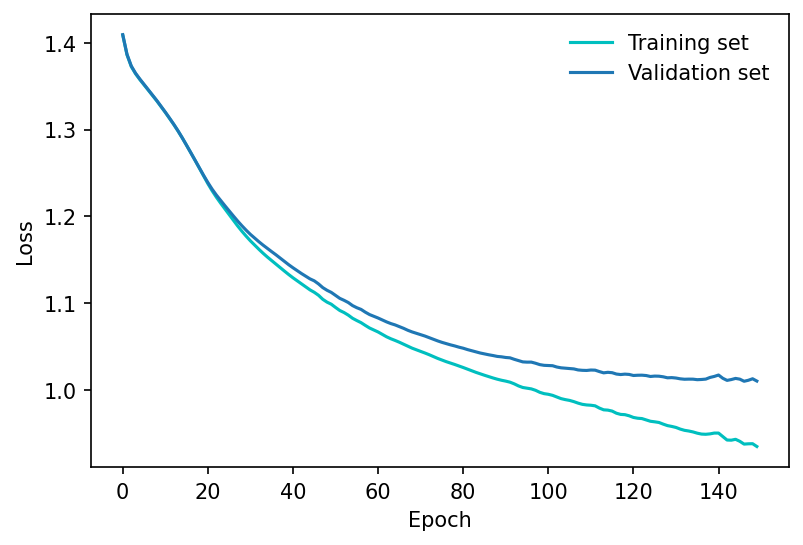

0.60296357

In [14]:
LBNdnn.fit(inputs.astype(np.float32), labels.astype(np.float32), inputs_val.astype(np.float32), labels_val.astype(np.float32))

In [15]:
Y_predict_train = LBNdnn.predict_proba(inputs.astype(np.float32))
Y_predict_val = LBNdnn.predict_proba(inputs_val.astype(np.float32))

#print(Y_predict_val)
print(inputs_val.shape, labels_val.shape)
#print(inputs_val, labels_val)
print(labels_val[baseline_targets[2]:baseline_targets[3]])
print(baseline_targets)
# for itarget, target in enumerate(targets):
#     for ilabel, label in enumerate(labels_val):
#         if label[itarget] == 1:
#             #print(ilabel, label, inputs_val[...,ilabel])
#             print(LBNdnn.predict_proba(inputs_val[...,ilabel].astype(np.float32)))
#baseline_targets.insert(0,0)
print(baseline_targets)

(30112, 6, 30) (30112, 4)
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
[0, 7582, 15071, 22597, 30112]
[0, 7582, 15071, 22597, 30112]


tf.Tensor(
[[0.6518683  0.21436939 0.05371439 0.08004794]
 [0.4217762  0.3890861  0.1822857  0.00685199]
 [0.30681196 0.34338877 0.34109822 0.00870102]
 ...
 [0.4415373  0.21810398 0.10006657 0.24029222]
 [0.31904098 0.40035287 0.12044641 0.16015974]
 [0.0781911  0.20295581 0.5469957  0.17185737]], shape=(30112, 4), dtype=float32)


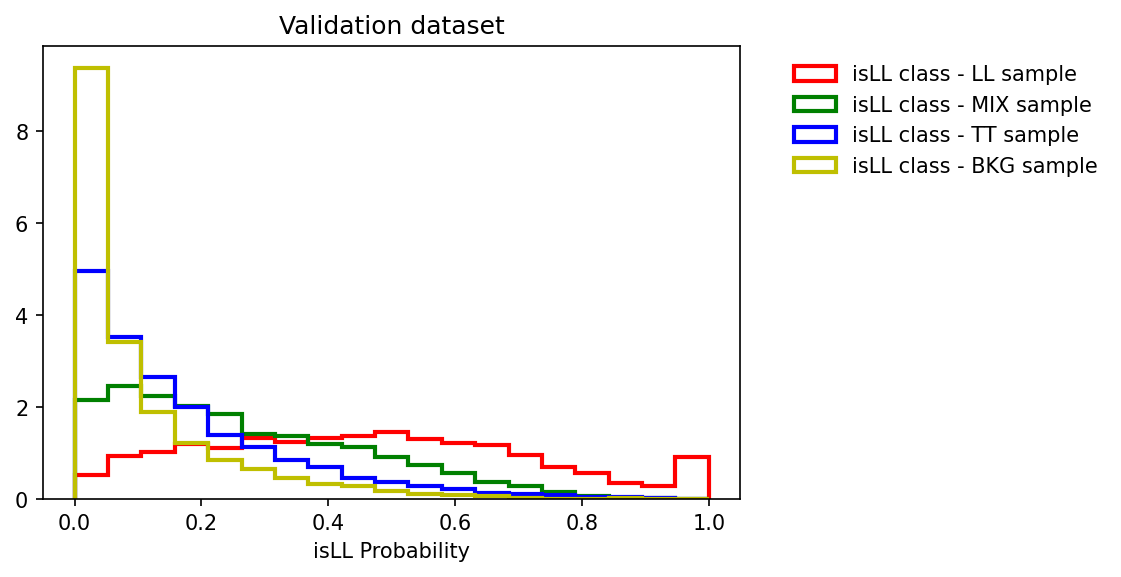

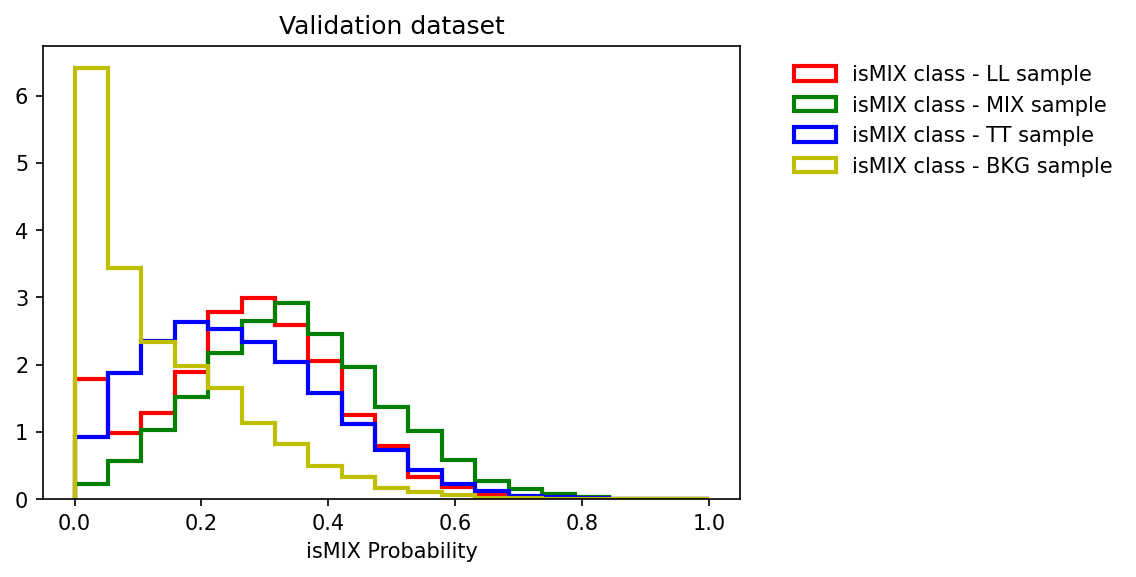

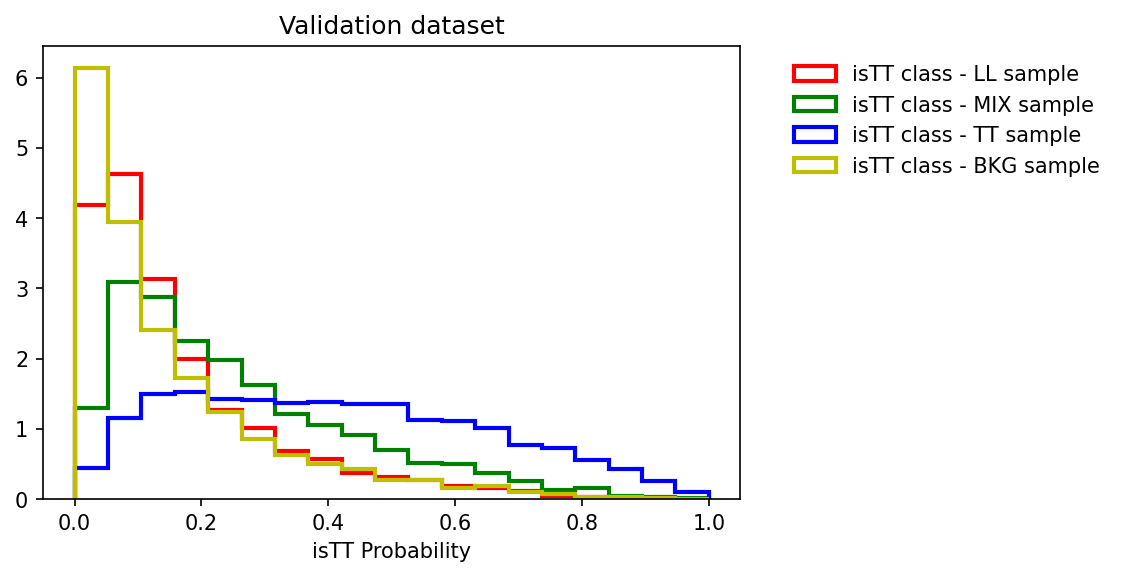

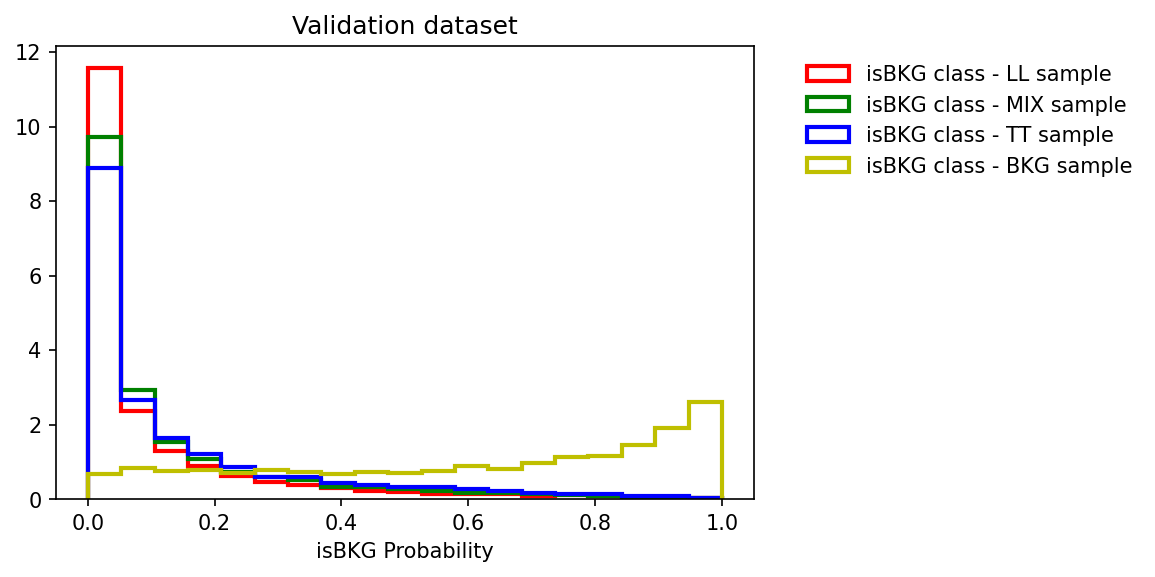

In [16]:
Y_predict_train = LBNdnn.predict_proba(inputs.astype(np.float32))
Y_predict_val = LBNdnn.predict_proba(inputs_val.astype(np.float32))

print(Y_predict_val)
axis = np.linspace(0,1,20)

#targets = ['LL', 'MIX', 'TT', 'BKG']
predictions = targets
colors = ['r', 'g', 'b', 'y']

Y_targets = {}
Y_predictions = {}

for itarget, target in enumerate(targets):
    Y_targets[target] = LBNdnn.predict_proba( inputs_val.astype(np.float32)[baseline_targets[itarget]:baseline_targets[itarget+1]] )
    Y_predictions[target] = {}
    for iprediction, prediction in enumerate(predictions):
        Y_predictions[target][prediction] = Y_targets[target][:,iprediction]

for prediction in predictions:
    for target, mycolor in zip(targets, colors):
        plt.hist(Y_predictions[target][prediction].numpy(), bins = axis, label = prediction + ' class - ' + target.strip('is') + ' sample', histtype='step', color=mycolor,  density=True, linewidth=2 )
    plt.title('Validation dataset')
    plt.xlabel(prediction + ' Probability')
    plt.legend(frameon=False, bbox_to_anchor=(1.05, 1.))
    #plt.yscale('log')
    plt.show()

In [17]:
from sklearn.metrics import accuracy_score
from scipy.stats import ks_2samp, anderson_ksamp

Y_true = labels_val
Y_pred = LBNdnn.predict_proba(inputs_val.astype(np.float32))

# The classifier categorical accuracy is a good and simple metrics to evaluate the overall classification performance
Y_true_max = np.argmax(Y_true, axis=1)
Y_pred_max = np.argmax(Y_pred, axis=1)
print("Classifier categorical accuracy = ", accuracy_score(Y_true_max, Y_pred_max))

Classifier categorical accuracy =  0.5601753453772582


In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
#from matplotlib.backends.backend_pdf import PdfPages

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize = 16)
    plt.yticks(tick_marks, classes, fontsize = 16)

    thresh = cm.max() / 1.2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",fontsize=10)

    plt.xlabel("Predicted label", fontsize=16)
    plt.ylabel("True label", fontsize=16)

    
    plt.tight_layout()

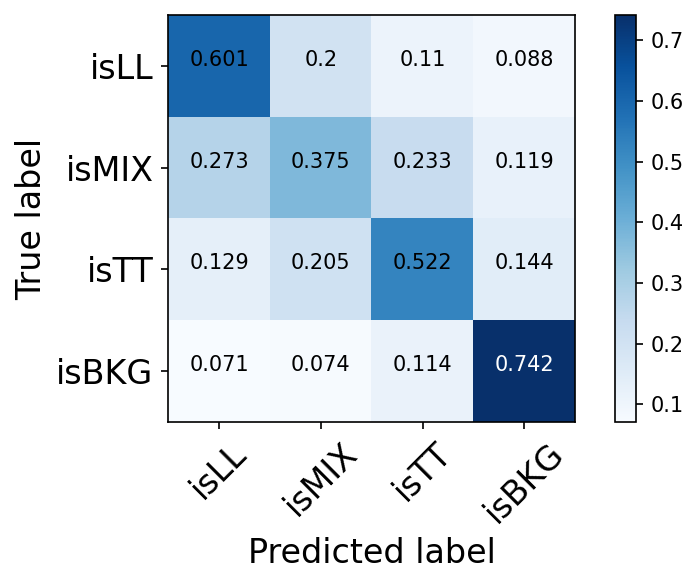

In [19]:
C = confusion_matrix(Y_true_max, Y_pred_max, normalize="true")
C = np.around(C, decimals=3)
#target_names = ['LL', 'MIX', 'TT','BKG']

plt.figure()
plot_confusion_matrix(C, classes=targets, title='')
plt.show(1) 

In [14]:
# df[df['isMIX']==1]
# seen = set()
# uniq = [x for x in (df[df['isTT']==1]).index.values.tolist() if x not in seen and not seen.add(x)]
# print(len(df[df['isMIX']==1]))

In [15]:
# v = df['LHEPart_pt_'+str(2)][6637]*np.array([math.cosh(df['LHEPart_eta_'+str(2)][6637]),
#                                                                                         math.cos(df['LHEPart_phi_'+str(2)][6637]),
#                                                                                         math.sin(df['LHEPart_phi_'+str(2)][6637]),
#                                                                                         math.sinh(df['LHEPart_eta_'+str(2)][6637])])
# print(df.loc[[6637]])
# print(df['LHEPart_eta_'+str(2)][6637]*np.array([math.cosh(df['LHEPart_eta_'+str(2)][6637]),math.cos(df['LHEPart_phi_'+str(2)][6637]),math.sin(df['LHEPart_phi_'+str(2)][6637]),math.sinh(df['LHEPart_eta_'+str(2)][6637])]))
# v = df['LHEPart_eta_'+str(2)][29524]*np.array([math.cosh(df['LHEPart_eta_'+str(2)][29524]),math.cos(df['LHEPart_phi_'+str(2)][29524]),math.sin(df['LHEPart_phi_'+str(2)][29524]),math.sinh(df['LHEPart_eta_'+str(2)][29524])])
# print(v)
# v = df['LHEPart_pt_'+str(2)][6637]*np.array([math.cosh(df['LHEPart_eta_'+str(2)][29524]),math.cos(df['LHEPart_phi_'+str(2)][29524]),math.sin(df['LHEPart_phi_'+str(2)][29524]),math.sinh(df['LHEPart_eta_'+str(2)][29524])])

In [114]:
inputs = np.ones((16000,6,4))
inputs[event,particle,...]
df.index.name = 'Index'
print(df.index.name)
df = df.rename_axis('Row',axis=1)
seen = set()
uniq = [x for x in (df[df['isBKG']>0]).index.values.tolist() if x not in seen and not seen.add(x)]
print(len(uniq))
print(len(df.index.values.tolist()))


Index
4000
16000
